In [49]:
using PyPlot

# (optional) change to a cool plot style. 
# see here for options: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("bmh")

# a conical tank emptying of liquid

derive (on pencil and paper) a dynamic model of the liquid level, $h=h(t)$ [m], in a conical tank as liquid autonomously flows out of it, through a pipe at the bottom with a small valve providing a narrow constriction for the outflow.

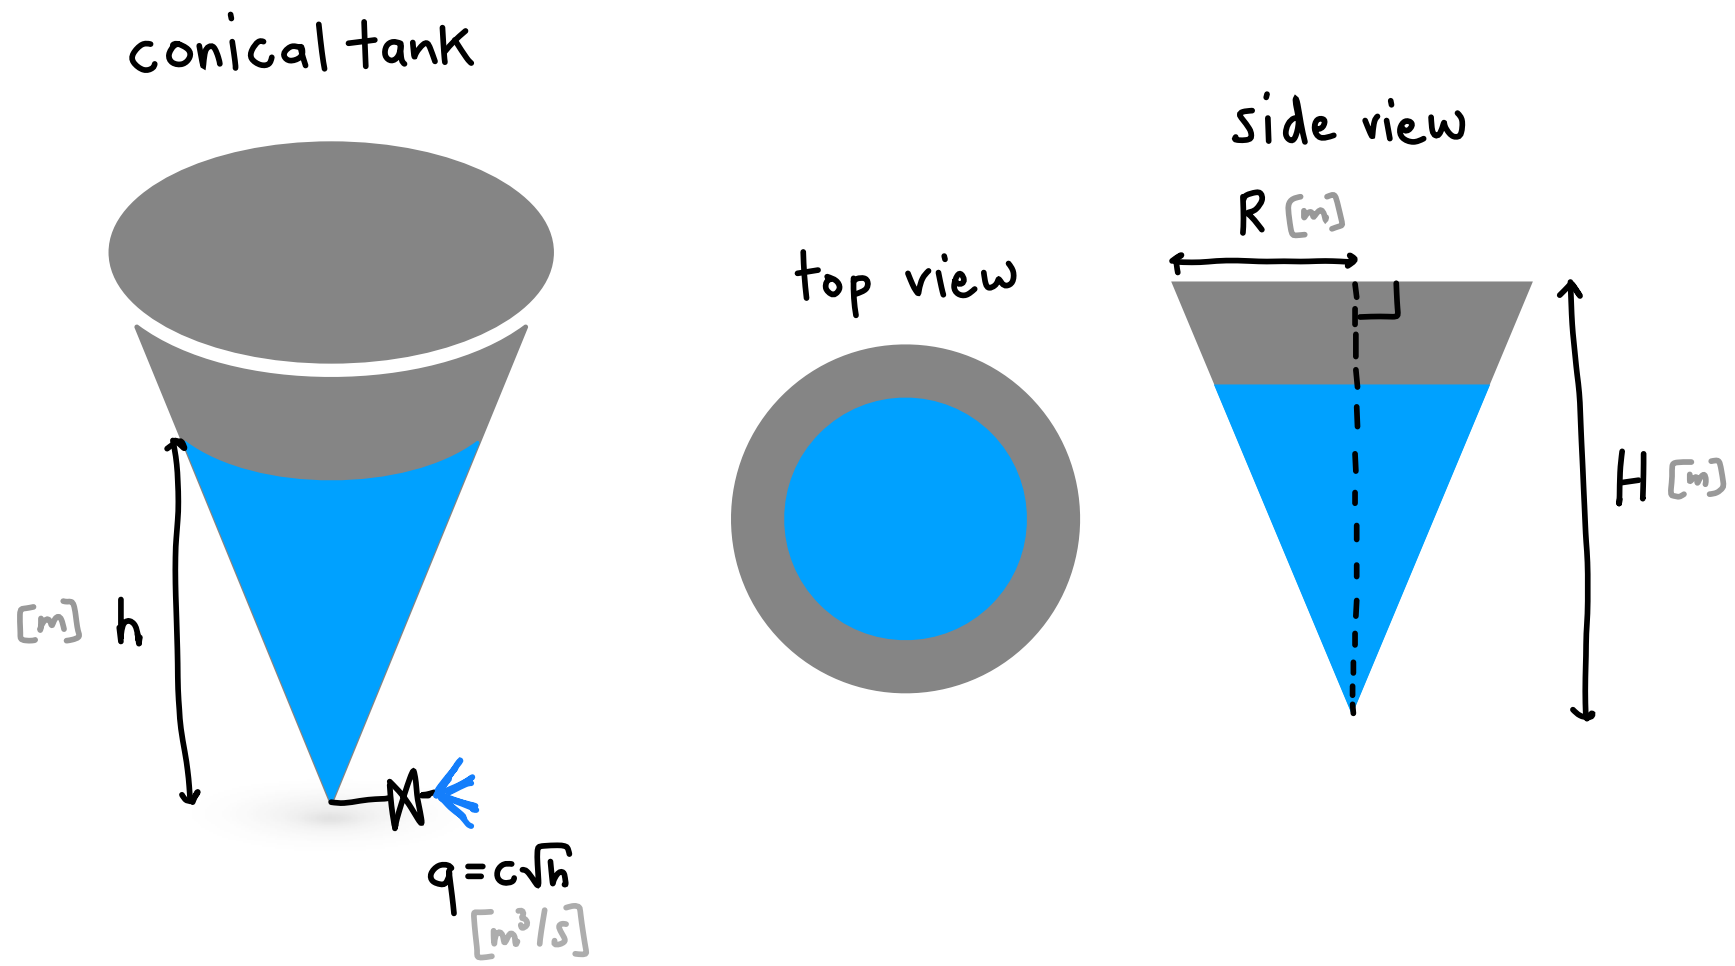

tank geometry is an inverted, right circular cone (see [here](https://en.wikipedia.org/wiki/Cone)).
* "right" cone $\implies$ axis passes through the centre of the base at right angles to its plane
* "circular" cone $\implies$ base is a circle
* "inverted" cone $\implies$ base is on the top
* height is $H$ [m]
* the radius of the circle forming the base is $R$ [m]

initial condition:
* the tank is initially full to the very brim

other assumptions:
* the liquid is of constant density $\rho$ [kg/m$^3$]
* volumetric flow rate out of the tank is driven by hydrostatic pressure and is related to the liquid level as $q=c\sqrt{h}$ [m$^3$/s]

your dynamic model should be an ODE in $h=h(t)$ and involve *only* the variables $H$, $R$, $c$, and $h$.

hints: (1) think about a differential slice of liquid in the tank-- of height $dh$. (2) find two similar triangles.

# finite difference methods

now, we will write our own code to find the numerical solution to your dynamic model, via a Forward Euler finite difference method, using the parameter settings below.

In [50]:
H = 2.0 # m
R = 0.4 # m
c = 0.00175 # m ^ (5/2) / s. intuitive that we see units of area here: friction of fluid with the *walls* of the pipe!

0.00175

(1) declare the initial liquid level as a variable `h₀`. (the tank is initially completely full of liquid.)

In [51]:
h₀ = 2.0 #initial liquid level (completely full)

2.0

(2) in Julia, code up the function `f(h)`, defined in relation to your dynamic model for $h=h(t)$ via:

$\dfrac{dh}{dt} = f(h)$

i.e. $f(h)$ is the right-hand side of the ODE in the form $\frac{dh}{dt}=\cdots$.

In [52]:
f(h) = (-c*H^2) / (π*h^(3/2)*R^2)

f (generic function with 1 method)

(3) to set up our finite difference approximation, define the time step `Δt` to be 0.05 s.

we wish to simulate the model in the time interval $t \in [0, 3]$ min. define a variable `tₙ` to be the final time in seconds, after we take the `n` time steps to arrive at the final time of 3 min.

define `n`, the number of time steps we should take with this `Δt` and `tₙ`. 
be sure to:
* actually write `n` in terms of `Δt` and `tₙ` so that we can change the time step later and have `n` automatically update, accordingly. 
* make `n` an integer by casting it as an `Int`. hint: `Int(5.0)` will give `5`. this is important for if we later want to do a loop like `for i = 1:n`.

In [53]:
Δt = 0.05 
tₙ = 180.0 #final time, s
n = Int(tₙ / Δt)  #number of steps 3600

3600

(4) time to discretize time.
define an array `t` with the time points $t_i$. i.e. element $i$ of the array `t` should be equal to $t_i= \Delta t (i-1)$ for $i \in \{1, 2, ..., n+1\}$. we go up to $n+1$ because the first element of `t` should be zero. the last entry of the `t` array should be `tₙ`.

In [54]:
t = zeros(n+1)

t = collect(range(0, tₙ, length = n + 1))

3601-element Array{Float64,1}:
   0.0
   0.05
   0.1
   0.15
   0.2
   0.25
   0.3
   0.35
   0.4
   0.45
   0.5
   0.55
   0.6
   ⋮
 179.45
 179.5
 179.55
 179.6
 179.65
 179.7
 179.75
 179.8
 179.85
 179.9
 179.95
 180.0

(5) we will store the approximations to the solution, $h_i \approx h(t_i)$'s, in an array `h`. pre-allocate this array with zeros, of the appropriate size to correspond to `t`, so $n+1$ elements. we'll overwrite these zeros later.

entry $i$ of the array `h` will hold $h(t_{i-1})$ for $i \in \{1, 2, ..., n+1\}$.

so the first element of `h` should contain the initial condition, `h₀`. go ahead and make the first element of `h` the initial condition.

In [55]:
h = zeros(n+1)
h[1] = h₀

2.0

(6) now implement the forward Euler method to approximate the solution to this ODE and fill in the rest of `h`. march ahead in time for `n` steps, via a `for` loop. you should use all of the following that you defined earlier:
* the `h` array
* the `t` array
* `Δt`
* `f(h)`

*ambitious Beavers*: you should see a `DomainError`. instead of ignoring it, you can fix it.
the domain error comes from passing a negative value of $h$ into a square root function in the right-hand side of the ODE.
this happens at the time point when the tank is fully emptied and the dynamics are "over", but there is a little bit of error emanating from the finite difference approximation.
to fix it, when the tank is finally empty, stop the time stepping and make sure the recent negative value of `h` is zeroed out.

In [56]:
for i = 1:n
    if h[i] > 0
        h[i+1] = h[i] + (Δt * f(h[i]))  
    end
end
h

3601-element Array{Float64,1}:
 2.0
 1.9997538197573008
 1.9995075940540732
 1.999261322867925
 1.9990150061764462
 1.9987686439572092
 1.998522236187768
 1.9982757828456585
 1.9980292839083993
 1.9977827393534902
 1.9975361491584134
 1.997289513300633
 1.9970428317575948
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

(7) plot your numerical solution $h(t)$, via plotting `h` vs `t`.

include an `xlabel` and `ylabel`. be sure to indicate the units. this is proper data visualization practice.

you might see a little blip in your plot at the point where the tank empties of liquid, owing to errors; see the *ambitious Beavers* problem above to fix it, if it bothers you like it did me.

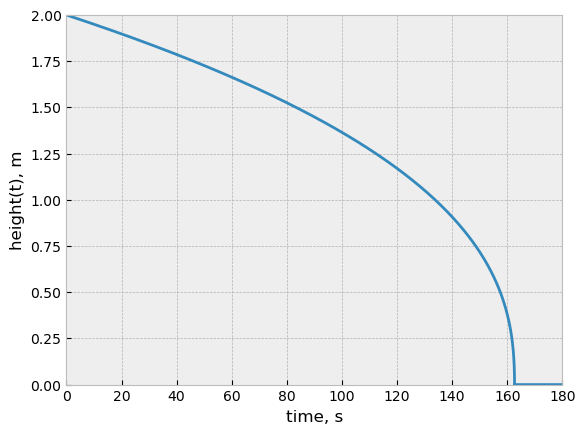

PyObject Text(25.0, 0.5, 'height(t), m')

In [57]:
figure()
plot(t,h, label = "h")
ylim(0,2)
xlim(0,180)
xlabel("time, s")
ylabel("height(t), m")

(8) although your dynamic model $\frac{dh}{dt}=f(h)$ is non-linear, in this special case with no input, you can solve for the analytical solution.

solve for the analytical solution, $h(t)$. hint: separation of variables $(\cdots)dh=(\cdots)dt$

now plot your approximate solution vs. the analytical solution $h(t)$ to see if you implemented the forward Euler method correctly. 
use a legend to indicate which curve is the analytical solution and which is the approximate solution.
pass `linestyle="--"` to make one of the lines dashed.

when computing the analytical solution, be careful about what values you pass into your function. square root functions cannot receive negative values as inputs. 
my strategy was to sovle for the time that the tank fully empties in the analytical expression, which allowed me to make an appropriate `range` of times for plotting the analytical solution.

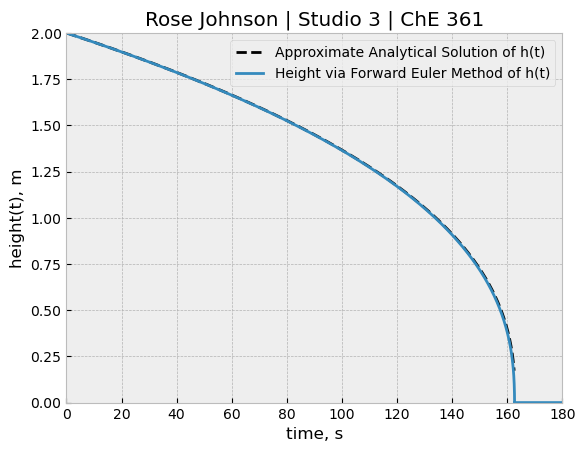

PyObject Text(0.5, 1.0, 'Rose Johnson | Studio 3 | ChE 361')

In [59]:
t_ap = (2/5)*H^(5/2) * (π*R^2)/(c*H^2) #time total
n_ap = Int(round(t_ap/Δt))-1 #Round time for an integer value for proper range
h2=zeros(n_ap+1) #make a place for the height values

h2[1] = 2 #initial condition, 2.0 m
t_ap_range = collect(range(0.0,t_ap, length = n_ap+1))
for i = 1:n_ap
 if h2[i] > 0 #no negative height
h2[i+1] = ((1/2)*(-0.0695*t_ap_range[i]+11.3137))^(2/5)
   end
end
t_ap_range[1]

figure()
xlim(0,180)
ylim(0,2.0)
plot(t_ap_range,h2,label="Approximate Analytical Solution of h(t)",color="black",linestyle="--")
plot(t,h,label="Height via Forward Euler Method of h(t)")
xlabel("time, s")
ylabel("height(t), m")
legend()
title("Rose Johnson | Studio 3 | ChE 361")

(9) explore what happens as you change the time step by changing `Δt` to different values and re-running the notebook.